# **Constitutive Modeling of Hyperelastic Materials**
---


## for uniaxial tension case


In this notebook, we develop and compare two widely used hyperelastic models:

*   **Neo-Hookean model** (single-parameter)
*   **Mooney–Rivlin model** (two-parameter)



*   **`SymPy`** for symbolic differentiation and invariant-based formulations
*   **`NumPy`** for numerical evaluation
*   **`Matplotlib`** for visualization of stress–stretch curves
*   **`IPython`** for interactive display and LaTeX rendering

This workflow enables us to:

✔ Define strain energy functions  
✔ Compute stress tensors (First Piola–Kirchhoff and Cauchy)  

***



## ✅ **Kinematics**


Let $(\mathbf{X})$ be a material point in the reference configuration and $(\mathbf{x} = \boldsymbol{\chi}(\mathbf{X},t))$ its position in the current configuration.

- #### Deformation gradient:
$$
\mathbf{F} = \frac{\partial \mathbf{x}}{\partial \mathbf{X}}
$$
- #### Jacobian (volume ratio):
$$
J = \det \mathbf{F}
$$
- #### Right Cauchy–Green tensor:
$$
\mathbf{C} = \mathbf{F}^T \mathbf{F}
$$
- #### Left Cauchy–Green tensor:
$$
\mathbf{B} = \mathbf{F}\mathbf{F}^T
$$

---


## ✅ Strain energy and stresses

Assume a hyperelastic material with strain energy density
$$
W = W(\mathbf{C}) \quad \text{(isotropic case)}.
$$

### Second Piola–Kirchhoff stress

By definition of a hyperelastic material,
$$
\mathbf{S} = 2\,\frac{\partial W}{\partial \mathbf{C}}.
$$

### First Piola–Kirchhoff stress

The First Piola–Kirchhoff stress is obtained by pushing $(\mathbf{S})$ forward:
$$
\mathbf{P} = \mathbf{F}\,\mathbf{S}.
$$

### Cauchy stress from \(W\)

Using the standard relation between Cauchy and Second Piola–Kirchhoff stresses,
$$
\boldsymbol{\sigma}
= \frac{1}{J}\,\mathbf{F}\,\mathbf{S}\,\mathbf{F}^T
= \frac{2}{J}\,\mathbf{F}\,\frac{\partial W}{\partial \mathbf{C}}\,\mathbf{F}^T.
$$

Equivalently, if $(W)$ is expressed in terms of the invariants $(I_1, I_2, I_3)$ of $(\mathbf{C})$,
$$
W = \widehat{W}(I_1, I_2, I_3),
$$
then one may use the chain rule
$$
\frac{\partial W}{\partial \mathbf{C}}
= \frac{\partial \widehat{W}}{\partial I_1}\,\frac{\partial I_1}{\partial \mathbf{C}}
+ \frac{\partial \widehat{W}}{\partial I_2}\,\frac{\partial I_2}{\partial \mathbf{C}}
+ \frac{\partial \widehat{W}}{\partial I_3}\,\frac{\partial I_3}{\partial \mathbf{C}},
$$
and substitute this into
$$
\boldsymbol{\sigma}
= \frac{2}{J}\,\mathbf{F}\,\frac{\partial W}{\partial \mathbf{C}}\,\mathbf{F}^T
$$
to obtain the explicit Cauchy stress expression.

For an incompressible material, $(J = 1)$ and the pressure term appears as a Lagrange multiplier:
$$
\boldsymbol{\sigma}
= -p\,\mathbf{I}
+ 2\,\mathbf{F}\,\frac{\partial W_{\text{iso}}}{\partial \mathbf{C}}\,\mathbf{F}^T,
$$

where $(p)$ is a Lagrange multiplier enforcing incompressibility and $(W_{\text{iso}})$ is the isochoric part of the energy.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display, Markdown

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 📘 1. Neo-Hookean Strain Energy Model 

---


## ✅ **strain energy density $W$**

For an **incompressible Neo-Hookean material**, the strain energy function is:

$$
\boxed{
W = \frac{\mu}{2}\left( I_1 - 3 \right)
}
$$
Where:

* $\mu$ = shear modulus
* $I_1 = 	\text{tr}(\mathbf{C}) = \lambda_1^2 + \lambda_2^2 + \lambda_3^2$
* Constraint:
  $$  \lambda_1 \lambda_2 \lambda_3 = 1
  $$* Pressure $p$ enters only in the stresses, not in (W).

---

## ✅ **Typical Neo-Hookean material parameters**

For rubber-type materials:

### **Common choices**

| Parameter               | Typical value     | Notes                 |
| ----------------------- | ----------------- | --------------------- |
| **Shear modulus (μ)**   | 0.1 MPa – 1.0 MPa | Soft rubber           |
| **Bulk modulus (κ)**    | 100–1000 × μ      | Nearly incompressible |
| **Poisson’s ratio (ν)** | 0.49–0.499        | Used to compute κ     |

### Example realistic parameters (used in literature):

*  $\mu = 0.5\ {MPa}$
*  $ u = 0.49 $
*  $\kappa = \frac{2\mu(1+u)}{3(1-2u)} \approx 83 \text{MPa} $

For pure incompressible Neo-Hookean:

* $\mu = 0.3 \text{MPa}$


---


## ✅ **Stress formulas - Neo Hookean Model:**


### Cauchy stress:
$$\boldsymbol{\sigma}
= \mu \mathbf{B} - p\mathbf{I}
$$
where:
$\mathbf{B} = \mathbf{F}\mathbf{F}^T$


### First Piola–Kirchhoff stress:
$$\mathbf{P} = \frac{\partial W}{\partial \mathbf{F}}$$


$$
\mathbf{P} = J\,\boldsymbol{\sigma}\,\mathbf{F}^{-T},
$$

and for incompressible materials \(J = 1\), so
$$
\mathbf{P} = \boldsymbol{\sigma}\,\mathbf{F}^{-T}.
$$

Substituting this into the previous expression gives
$$
\mathbf{P} = \left(\mu \mathbf{B} - p\mathbf{I}\right)\mathbf{F}^{-T}.
$$


In [17]:
mu, lambd, p = symbols('mu lambda p_ext')
I1 = Symbol('Ibar1',latex_name='r\bar{I}_1')
I2 = Symbol('Ibar2',latex_name='r\bar{I}_2')

In [18]:
W = mu/2*(I1-3.0)

display(Markdown("**Strain Energy Function ($w$):**"))
display(W)


**Strain Energy Function ($w$):**

mu*(Ibar1 - 3.0)/2

In [19]:
# Deformation Gradient for uniaxial tension
F_uni = Matrix([
    [lambd,  0,  0],
    [0, lambd**-0.5, 0],
    [0, 0, lambd**-0.5]
])
display(Markdown("**Deformation Gradient ($F$):**"))

display(F_uni)

**Deformation Gradient ($F$):**

Matrix([
[lambda,              0,              0],
[     0, lambda**(-0.5),              0],
[     0,              0, lambda**(-0.5)]])

In [20]:
sig_NH_term1 = diff(W,I1,1)
sig_NH_term2 = diff(W,I2,1)

# Left Cauchy-Green deformation tensor B = F * F^T 
B_uni = F_uni* F_uni.T 
Buni_inv = B_uni.inv()

display(Markdown(r"$B_{uni}$:"))
display(B_uni)

EYE = eye(3)
display(Markdown(r"$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$"))
display(sig_NH_term1)

siguni_NH_tot = -p*EYE + (2 * sig_NH_term1 * B_uni) - (2* sig_NH_term2 * Buni_inv)

display(Markdown("\n**Cauchy stress tensor ($\sigma$):**\n"))
display(siguni_NH_tot)

$B_{uni}$:

Matrix([
[lambda**2,              0,              0],
[        0, lambda**(-1.0),              0],
[        0,              0, lambda**(-1.0)]])

$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$

mu/2


**Cauchy stress tensor ($\sigma$):**


Matrix([
[lambda**2*mu - p_ext,                      0,                      0],
[                   0, mu/lambda**1.0 - p_ext,                      0],
[                   0,                      0, mu/lambda**1.0 - p_ext]])

#### For the uniaxial test condition, the hydrostatic pressure \( p \) is calculated as follows:


In [24]:
p_estimatedNH_uni = siguni_NH_tot[2,2] + p
display(Markdown('Hydrostatic pressure (p):'))
display(p_estimatedNH_uni)

Hydrostatic pressure (p):

mu/lambda**1.0

In [25]:
sigNH_uni_org = -p_estimatedNH_uni*EYE + (2 * sig_NH_term1 * B_uni) - (2* sig_NH_term2 * Buni_inv)

display(Markdown("## $\sigma_{uni}:$"))
display(sigNH_uni_org)

## $\sigma_{uni}:$

Matrix([
[-mu/lambda**1.0 + lambda**2*mu, 0, 0],
[                             0, 0, 0],
[                             0, 0, 0]])

In [26]:
# Assign numerical values to the variables - Neo Hookean material model
assigned_mu_uni_NH = {mu: 0.3}

sigmaNH_uni_withvals = sigNH_uni_org.subs(mu,0.3)

display(Markdown("\nsigma with parameters & values assigned:"))
display(sigmaNH_uni_withvals)


sigma with parameters & values assigned:

Matrix([
[-0.3/lambda**1.0 + 0.3*lambda**2, 0, 0],
[                               0, 0, 0],
[                               0, 0, 0]])

In [63]:
# Calculate the inverse transpose of the deformation Gradient (F)
Funi_inv_T  = F_uni.inv().T
#Funi_inv_T = F_inv.T
P_NH_uni = sigmaNH_uni_withvals *Funi_inv_T
display(Markdown("#### First Piola for Uniaxial tension $ (P):$"))

display(P_NH_uni)
#display(P_uni[0,0])


#### First Piola for Uniaxial tension $ (P):$

Matrix([
[(-0.3/lambda**1.0 + 0.3*lambda**2)/lambda, 0, 0],
[                                        0, 0, 0],
[                                        0, 0, 0]])

In [64]:
x_vec_uni = np.arange(1, 3,0.05)
#y_vec = np.array([N((sigma_uni_wvals.subs(lambd, xx))) for xx in x_vec])
sigma_vec_uni = np.array([sigmaNH_uni_withvals[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])
FPiola_vec_uni = np.array([P_NH_uni[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])


In [65]:
"""
fig, ax1 = plt.subplots(figsize=(12, 5))

#ax1.scatter(lambd_exp, sigma_exp, marker='h', color='b', label='Experimental Data')
ax1.plot(x_vec_uni, sigma_vec_uni, linestyle='-', color='r', linewidth=4, label='$\sigma$ Analytical')
ax1.plot(x_vec_uni, FPiola_vec_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P) Analytcal')

ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$\sigma$')
ax1.set_title('Neo-Hookean Model [Uniaxial Tension]')
ax1.legend()
ax1.set_xlim([1,3])
ax1.set_ylim([0,3.0])
ax1.grid(True)

plt.show()
"""

"\nfig, ax1 = plt.subplots(figsize=(12, 5))\n\n#ax1.scatter(lambd_exp, sigma_exp, marker='h', color='b', label='Experimental Data')\nax1.plot(x_vec_uni, sigma_vec_uni, linestyle='-', color='r', linewidth=4, label='$\\sigma$ Analytical')\nax1.plot(x_vec_uni, FPiola_vec_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P) Analytcal')\n\nax1.set_xlabel('$\\lambda$')\nax1.set_ylabel('$\\sigma$')\nax1.set_title('Neo-Hookean Model [Uniaxial Tension]')\nax1.legend()\nax1.set_xlim([1,3])\nax1.set_ylim([0,3.0])\nax1.grid(True)\n\nplt.show()\n"

In [66]:
data_NH = np.column_stack((x_vec_uni, FPiola_vec_uni))
np.savetxt("mydata.csv", data_NH, delimiter=",", fmt="%.6f", header="Lambda,P", comments="")

# 📘 2. Mooney–Rivlin Strain Energy Model 

***

## ✅ **strain energy density $W$**

### **Incompressible two-parameter Mooney–Rivlin:**

$$
W = C_{10}(I_1 - 3) + C_{01}(I_2 - 3)
$$

Where:

*   $C_{10}, C_{01}$ are material constants (units: stress)
*   $I_1 = \operatorname{tr}(\mathbf{C})$, $I_2 = \frac{1}{2} [(\operatorname{tr}\mathbf{C})^2 - \operatorname{tr}(\mathbf{C}^2)]$
*   $\mathbf{C} = \mathbf{F}^\mathsf{T} \mathbf{F}$ is the right Cauchy–Green tensor
*   Incompressibility constraint: $J = \det\mathbf{F} = 1$

***

### **Compressible (isochoric–volumetric split):**

$$
W = C_{10}(\bar I_1 - 3) + C_{01}(\bar I_2 - 3) + \frac{\kappa}{2}(J - 1)^2
$$

with

$$
\bar I_1 = J^{-2/3} I_1, \qquad \bar I_2 = J^{-4/3} I_2, \qquad J = \det\mathbf{F}.
$$

***

## ✅ Typical material parameters

*   **Neo-Hookean**: $\mu \approx 0.1$–$1.0$ MPa, $\kappa \approx 100$–$1000\mu$
*   **Mooney–Rivlin**: $C_{10}, C_{01} \approx 0.01$–$1.0$ MPa, $\kappa$ large for near-incompressibility

Example: $C_{10}=0.2$ MPa, $C_{01}=0.05$ MPa, $\kappa=50$ MPa.

---
## ✅ **Stress formulas - Mooney-Rivlin Model:**

### Cauchy stress:

*   **Incompressible Mooney–Rivlin**:

$$
\boldsymbol{\sigma} = -p\mathbf{I} + 2C_{10}\mathbf{B} - 2C_{01}\mathbf{B}^{-1}
$$



In [67]:
# Assign numerical values to the variables - Mooney Rivlin material model
c10, c01 = symbols('C_10 C_01')

W_MR = c10 * (I1- 3.0) + c01*(I2 - 3.0)
display(Markdown("**Strain Energy Function for Mooney-Rivlin model ($w$):**"))
display(W_MR)

**Strain Energy Function for Mooney-Rivlin model ($w$):**

C_01*(Ibar2 - 3.0) + C_10*(Ibar1 - 3.0)

In [68]:
sig_MR_term1 = diff(W_MR,I1,1)
sig_MR_term2 = diff(W_MR,I2,1)

display(Markdown(r"$ \frac{\partial W_{MR}}{\partial \mathbf I_{1}} = $"))
display(sig_MR_term1)
display(Markdown(r"$$ \frac{\partial W_{MR}}{\partial \mathbf I_{2}} = $$"))
display(sig_MR_term2)


display(Markdown(r"$B_{uni}$:"))
display(B_uni)


$ \frac{\partial W_{MR}}{\partial \mathbf I_{1}} = $

C_10

$$ \frac{\partial W_{MR}}{\partial \mathbf I_{2}} = $$

C_01

$B_{uni}$:

Matrix([
[lambda**2,              0,              0],
[        0, lambda**(-1.0),              0],
[        0,              0, lambda**(-1.0)]])

In [69]:
siguni_MR_tot = -p*EYE + (2 * sig_MR_term1 * B_uni) - (2* sig_MR_term2 * Buni_inv)

display(Markdown("\n**Cauchy stress tensor for Mooney-Rivlin model ($\sigma$):**\n"))
display(siguni_MR_tot)


**Cauchy stress tensor for Mooney-Rivlin model ($\sigma$):**


Matrix([
[-2*C_01/lambda**2 + 2*C_10*lambda**2 - pw,                                             0,                                             0],
[                                        0, -2*C_01*lambda**1.0 + 2*C_10/lambda**1.0 - pw,                                             0],
[                                        0,                                             0, -2*C_01*lambda**1.0 + 2*C_10/lambda**1.0 - pw]])

In [70]:
p_estimated_MR_uni = siguni_MR_tot[2,2] + p
display(Markdown(r'### Hydrostatic pressure for Mooney-Rivlin model (p):'))
display(p_estimated_MR_uni)

### Hydrostatic pressure for Mooney-Rivlin model (p):

-2*C_01*lambda**1.0 + 2*C_10/lambda**1.0

In [71]:
sigMR_uni_org = -p_estimated_MR_uni*EYE + (2 * sig_MR_term1 * B_uni) - (2* sig_MR_term2 * Buni_inv)

display(Markdown(r"### $\sigma_{uni}$ - Mooney-Rivlin:"))
display(sigMR_uni_org)

### $\sigma_{uni}$ - Mooney-Rivlin:

Matrix([
[2*C_01*lambda**1.0 - 2*C_01/lambda**2 - 2*C_10/lambda**1.0 + 2*C_10*lambda**2, 0, 0],
[                                                                            0, 0, 0],
[                                                                            0, 0, 0]])

In [72]:
# Assign numerical values to the variables - Mooney Rivlin material model
assigned_mu_uni_MR = {c10: 0.3, c01: 0.08}
sigmaMR_uni_withvals = sigMR_uni_org.subs(assigned_mu_uni_MR)

display(Markdown(r"### $\sigma_{uni}$ - Mooney-Rivlin:"))
display(sigmaMR_uni_withvals)

### $\sigma_{uni}$ - Mooney-Rivlin:

Matrix([
[-0.6/lambda**1.0 + 0.6*lambda**2 + 0.16*lambda**1.0 - 0.16/lambda**2, 0, 0],
[                                                                   0, 0, 0],
[                                                                   0, 0, 0]])

In [73]:
P_MR_uni = sigmaMR_uni_withvals *Funi_inv_T

display(Markdown("### $P_{uni}$ - Mooney-Rivlin"))
display(P_MR_uni)

### $P_{uni}$ - Mooney-Rivlin

Matrix([
[(-0.6/lambda**1.0 + 0.6*lambda**2 + 0.16*lambda**1.0 - 0.16/lambda**2)/lambda, 0, 0],
[                                                                            0, 0, 0],
[                                                                            0, 0, 0]])

In [74]:
sigma_MR_uni = np.array([sigmaMR_uni_withvals[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])
FPiola_MR_uni = np.array([P_MR_uni[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])
#print(sigma_MR_uni)

[2.77555756156289e-17 0.112946712018141 0.224314049586777
 0.334777882797732 0.444888888888889 0.555100000000001 0.665786982248521
 0.777264060356654 0.889795918367348 1.00360701545779 1.11888888888889
 1.23580593132154 1.35450000000000 1.47509412304867 1.59769550173011
 1.72239795918368 1.84928395061729 1.97842622352082 2.10988919667590
 2.24373011176858 2.38000000000000 2.51874449732302 2.66000453514739
 2.80381692806923 2.95021487603306 3.09922839506173 3.25088468809074
 3.40520846536895 3.56222222222223 3.72194648063307 3.88440000000000
 4.04959996155325 4.21756213017752 4.38830099679602 4.56182990397806
 4.73816115702480 4.91730612244899 5.09927531548169 5.28407847800238
 5.47172464808964]


In [75]:
data_MR = np.column_stack((x_vec_uni, FPiola_MR_uni))
np.savetxt("MR_data.csv", data_MR, delimiter=",", fmt="%.6f", header="Lambda,P", comments="")

In [76]:
"""
yeoh_abaqus_uniaxial
df_abaqus = pd.read_excel("book1.xlsx", usecols=[0, 1])   # read first 2 columns
print(df_abaqus)
stretch_abaqus = (df_abaqus.iloc[:, 0]/80)+1
print(stretch_abaqus)


df_abaqus_MR = pd.read_excel("book_MR.xlsx", usecols=[0, 1])   # read first 2 columns

stretch_abaqus_MR = (df_abaqus_MR.iloc[:, 0] / 80.0) + 1.0
"""

'\ndf_abaqus = pd.read_excel("book1.xlsx", usecols=[0, 1])   # read first 2 columns\nprint(df_abaqus)\nstretch_abaqus = (df_abaqus.iloc[:, 0]/80)+1\nprint(stretch_abaqus)\n\n\ndf_abaqus_MR = pd.read_excel("book_MR.xlsx", usecols=[0, 1])   # read first 2 columns\n\nstretch_abaqus_MR = (df_abaqus_MR.iloc[:, 0] / 80.0) + 1.0\n'

# 📘 3. Gent Strain Energy Model

***

## ✅ **Strain energy density \(W\)**

For an **incompressible Gent material**, the strain energy function is

$$
\boxed{
W = -\frac{\mu J_m}{2}\,\ln\!\left(1 - \frac{I_1 - 3}{J_m}\right)
}
$$


Where:

- \($\mu$) = shear modulus (small‑strain shear stiffness)  
- $(I_1 = \text{tr}(\mathbf{C}) = \lambda_1^2 + \lambda_2^2 + \lambda_3^2$) is the first invariant of the right Cauchy–Green tensor  
- $(J_m)$ = *limiting chain extensibility* parameter, controlling how close $(I_1)$ can get to $(3 + J_m)$

Subject to the incompressibility constraint

$$
\lambda_1 \lambda_2 \lambda_3 = 1
$$

The Gent model reduces to the Neo‑Hookean model in the limit $(J_m \to \infty)$, and introduces a **finite extensibility** effect by making $(W)$ blow up as $(I_1 \to 3 + J_m)$.

---

### Typical Gent material parameters



| Parameter                | Typical value                    | Notes                                       |
| ------------------------ | -------------------------------- | ------------------------------------------- |
| **Shear modulus (\(\mu\))** | 0.1–2.0 MPa                      | Soft to moderately stiff rubber             |
| **Limiting parameter (\(J_m\))** | 10–200                          | Low: early stiffening; high: near Neo-Hookean |
| **Bulk modulus (\(\kappa\))**   | 100–1000 × \(\mu\)              | If a compressible Gent variant is used      |
| **Poisson’s ratio (\(\nu\))**   | 0.49–0.499                     | Used to derive \(\kappa\) if needed         |

#### Example realistic parameter sets

- Moderately soft elastomer with noticeable strain‑stiffening:  
  - $(\mu = 0.5\ \text{MPa})  $
  - $(J_m = 20)$ (stiffening starts around \(I_1 - 3 \sim 20\); suitable for large stretches)  

- Very soft rubber, behavior close to Neo‑Hookean in your test range:  
  - $(\mu = 0.3\ \text{MPa})  $
  - $(J_m = 80\text{–}150)$ (stiffening only at very large stretches; effectively generalized Neo‑Hookean in moderate strains)  

- If you need a bulk modulus for a *slightly compressible* Gent material, you can reuse the same relation as for Neo‑Hookean:
  $$
  \kappa = \frac{2\mu(1+\nu)}{3(1-2\nu)},
  $$
  with $(\nu \approx 0.49)$, giving $(\kappa \sim 100\mu–300\mu)$ for typical rubbers.
--- 

## ✅ **Stress formulas - Gent Model:**

### Cauchy stress:

*   **Incompressible Mooney–Rivlin**:

$$
\boldsymbol{\sigma} = -p\mathbf{I} + 2C_{10}\mathbf{B} - 2C_{01}\mathbf{B}^{-1}
$$


In [77]:
# Symbols 
mu, Jm = symbols('mu J_m', positive=True)

# Gent strain energy density W(I1)

W_gent = -mu*Jm/2 * log( 1 - (I1 - 3)/Jm)

display(Markdown("**Gent Strain Energy Function ($w$):**"))
display(W_gent)


**Gent Strain Energy Function ($w$):**

-J_m*mu*log(1 - (Ibar1 - 3)/J_m)/2

In [78]:
sig_G_term1 = diff(W_gent,I1,1)

# Left Cauchy-Green deformation tensor B = F * F^T 


display(Markdown(r"$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$"))
display(sig_G_term1)

siguni_G_tot = -p*EYE + (2 * sig_G_term1 * B_uni)

display(Markdown("\n**Cauchy stress tensor ($\sigma$):**\n"))
display(siguni_G_tot)

$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$

mu/(2*(1 - (Ibar1 - 3)/J_m))


**Cauchy stress tensor ($\sigma$):**


Matrix([
[lambda**2*mu/(1 - (Ibar1 - 3)/J_m) - pw,                                           0,                                           0],
[                                      0, mu/(lambda**1.0*(1 - (Ibar1 - 3)/J_m)) - pw,                                           0],
[                                      0,                                           0, mu/(lambda**1.0*(1 - (Ibar1 - 3)/J_m)) - pw]])

In [79]:
p_EstGent_uni = siguni_G_tot[2,2] + p
display(Markdown('Hydrostatic pressure (p) for Uniaxial test (Gent):'))
display(p_EstGent_uni)

Hydrostatic pressure (p) for Uniaxial test (Gent):

mu/(lambda**1.0*(1 - (Ibar1 - 3)/J_m))

In [80]:
sigG_uni_org = -p_EstGent_uni*EYE + (2 * sig_G_term1 * B_uni) 
display(Markdown("## $\sigma_{uni}:$"))
display(sigG_uni_org)

## $\sigma_{uni}:$

Matrix([
[-mu/(lambda**1.0*(1 - (Ibar1 - 3)/J_m)) + lambda**2*mu/(1 - (Ibar1 - 3)/J_m), 0, 0],
[                                                                           0, 0, 0],
[                                                                           0, 0, 0]])

In [81]:
# Invariants of B
BI1_uni = B_uni.trace()


# Assign numerical values to the variables and substitute them into the B matrix
AsgVal_G_uni = {mu:0.3,Jm: 60, I1: BI1_uni}
AsgVal_G_uni_for_txt  = {mu:0.3,Jm: 60}
sigmaG_uni_withvals = sigG_uni_org.subs(AsgVal_G_uni)

In [82]:
P_G_uni = sigmaG_uni_withvals *Funi_inv_T
display(Markdown("#### First Piola $P_{uni} - Gent:$"))

display(P_G_uni)

#### First Piola $P_{uni} - Gent:$

Matrix([
[(-0.3/(lambda**1.0*(-1/(30*lambda**1.0) - lambda**2/60 + 21/20)) + 0.3*lambda**2/(-1/(30*lambda**1.0) - lambda**2/60 + 21/20))/lambda, 0, 0],
[                                                                                                                                    0, 0, 0],
[                                                                                                                                    0, 0, 0]])

In [83]:
sigma_G_uni = np.array([sigmaG_uni_withvals[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])
FPiola_G_uni = np.array([P_G_uni[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])

# 📘 4. Yeoh Strain Energy Model

***

## ✅ **Strain energy density \(W\)**

For an **incompressible Yeoh material**, the strain energy density is expressed as a polynomial in \(I_1 - 3\):

$$
\boxed{
W = C_1 (I_1 - 3)
    + C_2 (I_1 - 3)^2
    + C_3 (I_1 - 3)^3
}
$$

Where:

- $(C_1, C_2, C_3\)$ are material parameters.  
- $(I_1 = \text{tr}(\mathbf{C}) = \lambda_1^2 + \lambda_2^2 + \lambda_3^2)$ is the first invariant of the right Cauchy–Green tensor.  
- Incompressible constraint:
  $
  \lambda_1 \lambda_2 \lambda_3 = 1
  $
- The small‑strain shear modulus is
  $
  \mu = 2\,\frac{\partial W}{\partial I_1}\Big|_{I_1=3} = 2 C_1.
  $

Higher‑order terms $(C_2, C_3)$ control nonlinearity and strain‑stiffening at large stretches.

***

## ✅ Typical Yeoh material parameters

For **rubber-like, nearly incompressible materials**, the Yeoh model parameters are often in these ranges (order of magnitude, for guidance):


| Parameter                 | Typical magnitude          | Notes                                      |
| ------------------------- | -------------------------- | ------------------------------------------ |
| \(C_1\)                   | (0.05\)–\(1.0\) MPa      | Sets initial shear modulus \(\mu = 2C_1\)  |
| \(C_2\)                   | (|C_2| \sim 10^{-3}\)–\(10^{-1}) MPa | Controls curvature/nonlinearity           |
| \(C_3\)                   | (|C_3| \sim 10^{-4}\)–\(10^{-2}) MPa | Fine‑tunes high‑strain stiffening         |
| Bulk modulus \(\kappa\)   | (100\)–\(1000 \times \mu\) | If a compressible Yeoh variant is used    |
| Poisson’s ratio \(\nu\)   | (0.49\)–\(0.499\)        | For deriving \(\kappa\) in FE codes        |

### Example parameter sets (illustrative)

- **Moderately soft rubber** with noticeable strain stiffening:
  - $(C_1 = 0.25\ \text{MPa})  (\Rightarrow \mu = 0.5 \text{MPa})  $
  - $(C_2 = 0.02\ \text{MPa})$  
  - $(C_3 = 0.001\ \text{MPa})$

- **Very soft elastomer**, weak nonlinearity in the tested range:
  - $(C_1 = 0.15\ \text{MPa})  (\Rightarrow \mu = 0.3\ \text{MPa})$
  - $(C_2 = -0.005\ \text{MPa})$  
  - $(C_3 = 0\ \text{MPa})$  (second‑order Yeoh)
---

## ✅ **Stress formulas - Yeoh Model:**

### Cauchy stress:

*   **Incompressible Mooney–Rivlin**:

$$
\boldsymbol{\sigma} = -p\mathbf{I} + 2C_{10}\mathbf{B} - 2C_{01}\mathbf{B}^{-1}
$$

In [84]:
# Symbols 
# Gent strain energy density W(I1)
cy1, cy2, cy3 = symbols('C_y1 C_y2 C_y3', real=True)   # Yeoh parameters

# --- 1. Yeoh strain-energy density W(I1) ---
W_yeoh = cy1*(I1 - 3.0) + cy2*(I1 - 3.0)**2 + cy3*(I1 - 3.0)**3
display(Markdown("**Yeoh Strain Energy Function ($w$):**"))
display(W_yeoh)


**Yeoh Strain Energy Function ($w$):**

C_y1*(Ibar1 - 3.0) + C_y2*(Ibar1 - 3.0)**2 + C_y3*(Ibar1 - 3.0)**3

In [85]:
sig_Y_term1 = diff(W_yeoh,I1,1)

# Left Cauchy-Green deformation tensor B = F * F^T 


display(Markdown(r"$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$"))
display(sig_Y_term1)

siguni_Y_tot = -p*EYE + (2 * sig_Y_term1 * B_uni)

display(Markdown("\n**Cauchy stress tensor ($\sigma$):**\n"))
display(siguni_Y_tot)

$$ \frac{\partial W}{\partial \mathbf I_{1}} = $$

C_y1 + C_y2*(2*Ibar1 - 6.0) + 3*C_y3*(Ibar1 - 3.0)**2


**Cauchy stress tensor ($\sigma$):**


Matrix([
[lambda**2*(2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2) - pw,                                                                            0,                                                                            0],
[                                                                         0, (2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2)/lambda**1.0 - pw,                                                                            0],
[                                                                         0,                                                                            0, (2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2)/lambda**1.0 - pw]])

In [86]:
p_EstYeoh_uni = siguni_Y_tot[2,2] + p
display(Markdown('Hydrostatic pressure (p) for Uniaxial test (Yeoh):'))
display(p_EstYeoh_uni)

Hydrostatic pressure (p) for Uniaxial test (Yeoh):

(2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2)/lambda**1.0

In [87]:
sigY_uni_org = -p_EstYeoh_uni*EYE + (2 * sig_Y_term1 * B_uni) 
display(Markdown("## $\sigma_{uni}:$ Yeoh"))
display(sigY_uni_org)

## $\sigma_{uni}:$ Yeoh

Matrix([
[-(2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2)/lambda**1.0 + lambda**2*(2*C_y1 + 2*C_y2*(2*Ibar1 - 6.0) + 6*C_y3*(Ibar1 - 3.0)**2), 0, 0],
[                                                                                                                                               0, 0, 0],
[                                                                                                                                               0, 0, 0]])

In [90]:
# Assign numerical values to the variables and substitute them into the B matrix
AsgVal_Y_uni = {cy1:0.15,cy2: -0.001,cy3:0.002, I1: BI1_uni}
Cy10, Cy20, Cy30 = symbols('C10 C20 C30', real=True)   # Yeoh parameters

AsgVal_Y_uni_for_txt  = {Cy10:0.15,Cy20: -0.001,Cy30:0.002}
sigmaY_uni_withvals = sigY_uni_org.subs(AsgVal_Y_uni)


P_Y_uni = sigmaY_uni_withvals *Funi_inv_T
display(Markdown("#### First Piola $P_{uni} - Yeoh:$"))

display(P_Y_uni)

#### First Piola $P_{uni} - Yeoh:$

Matrix([
[(-(-0.008/lambda**1.0 - 0.004*lambda**2 + 0.012*(2/lambda**1.0 + lambda**2 - 3.0)**2 + 0.312)/lambda**1.0 + lambda**2*(-0.008/lambda**1.0 - 0.004*lambda**2 + 0.012*(2/lambda**1.0 + lambda**2 - 3.0)**2 + 0.312))/lambda, 0, 0],
[                                                                                                                                                                                                                        0, 0, 0],
[                                                                                                                                                                                                                        0, 0, 0]])

In [91]:
sigma_Y_uni = np.array([sigmaY_uni_withvals[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])
FPiola_Y_uni = np.array([P_Y_uni[0,0].subs(lambd, xx).evalf() for xx in x_vec_uni])

In [120]:
yeoh_abaqus_uniaxial = pd.read_excel("yeoh_abaqus_uniaxial.xlsx", usecols=[0, 1])   # read first 2 columns
MooneyRivlin_abaqus_uniaxial = pd.read_excel("MooneyRivlin_abaqus_uniaxial.xlsx", usecols=[0, 1])   # read first 2 columns
NeoHooke_abaqus_uniaxial = pd.read_excel("NeoHooke_abaqus_uniaxial.xlsx", usecols=[0, 1])   # read first 2 columns
Gent_abaqus_uniaxial = pd.read_excel("Gent_abaqus_uniaxial.xlsx", usecols=[0, 1])   # read first 2 columns

stretch_yeoh_abaqus = (yeoh_abaqus_uniaxial.iloc[:, 0]/80)+1
stretch_MR_abaqus = (MooneyRivlin_abaqus_uniaxial.iloc[:, 0]/80)+1
stretch_NH_abaqus = (NeoHooke_abaqus_uniaxial.iloc[:, 0]/80)+1
stretch_G_abaqus = (Gent_abaqus_uniaxial.iloc[:, 0]/80)+1



#df_abaqus_MR = pd.read_excel("book_MR.xlsx", usecols=[0, 1])   # read first 2 columns

#stretch_abaqus_MR = (df_abaqus_MR.iloc[:, 0] / 80.0) + 1.0


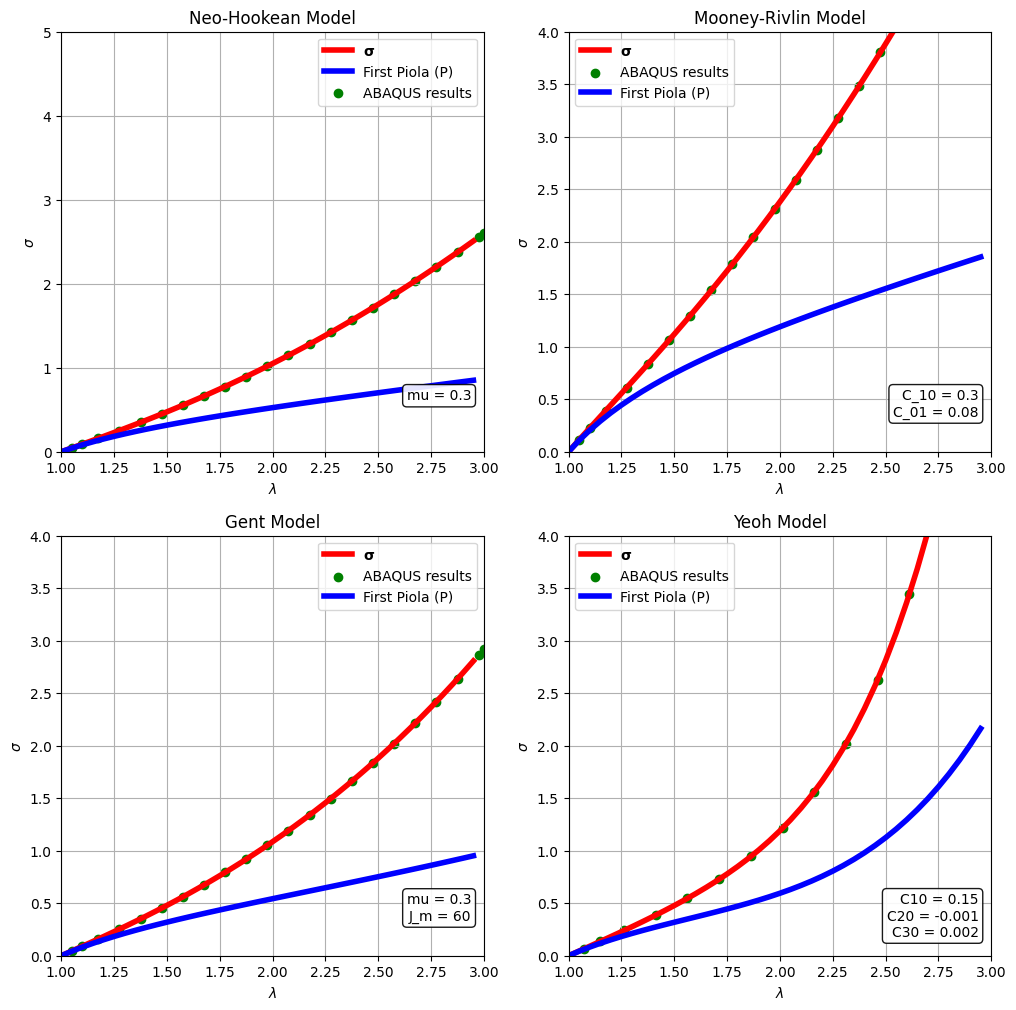

In [121]:
def add_param_box(ax, text):
    ax.text(
        0.97, 0.15, text,                 # top-right in axes coords
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=10,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
    )

fig, axes = plt.subplots(2,2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.flatten()

#ax1.scatter(lambd_exp, sigma_exp, marker='h', color='b', label='Experimental Data')
ax1.plot(x_vec_uni, sigma_vec_uni, linestyle='-', color='r', linewidth=4, label=r'$\mathbf{\sigma}$')
ax1.plot(x_vec_uni, FPiola_vec_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P)')
ax1.scatter(stretch_NH_abaqus, NeoHooke_abaqus_uniaxial.iloc[:, 1], color='g', label='ABAQUS results')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$\sigma$')
ax1.set_title('Neo-Hookean Model')
ax1.legend()
ax1.set_xlim([1,3])
ax1.set_ylim([0,5])
ax1.grid(True)
textstr1 = "\n".join(f"{k} = {v}" for k, v in assigned_mu_uni_NH.items())
add_param_box(ax1, textstr1)

# ---------
ax2.plot(x_vec_uni, sigma_MR_uni, linestyle='-', color='r', linewidth=4, label=r'$\mathbf{\sigma}$')
ax2.scatter(stretch_MR_abaqus, MooneyRivlin_abaqus_uniaxial.iloc[:, 1], color='g', label='ABAQUS results')
ax2.plot(x_vec_uni, FPiola_MR_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P)')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('$\sigma$')
ax2.set_title('Mooney-Rivlin Model')
ax2.legend()
ax2.set_xlim([1,3])
ax2.set_ylim([0,4])
ax2.grid(True)
textstr2 = "\n".join(f"{k} = {v}" for k, v in assigned_mu_uni_MR.items())
add_param_box(ax2, textstr2)


# ---------
ax3.plot(x_vec_uni, sigma_G_uni, linestyle='-', color='r', linewidth=4, label=r'$\mathbf{\sigma}$')
ax3.scatter(stretch_G_abaqus, Gent_abaqus_uniaxial.iloc[:, 1], color='g', label='ABAQUS results')
ax3.plot(x_vec_uni, FPiola_G_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P)')
ax3.set_xlabel('$\lambda$')
ax3.set_ylabel('$\sigma$')
ax3.set_title('Gent Model')
ax3.legend()
ax3.set_xlim([1,3])
ax3.set_ylim([0,4])
ax3.grid(True)
textstr3 = "\n".join(f"{k} = {v}" for k, v in AsgVal_G_uni_for_txt.items())
add_param_box(ax3, textstr3)


# ---------
ax4.plot(x_vec_uni, sigma_Y_uni, linestyle='-', color='r', linewidth=4, label=r'$\mathbf{\sigma}$')
ax4.scatter(stretch_yeoh_abaqus, yeoh_abaqus_uniaxial.iloc[:, 1], color='g', label='ABAQUS results')
ax4.plot(x_vec_uni, FPiola_Y_uni, linestyle='-', color='b', linewidth=4, label='First Piola (P)')
ax4.set_xlabel('$\lambda$')
ax4.set_ylabel('$\sigma$')
ax4.set_title('Yeoh Model')
ax4.legend()
ax4.set_xlim([1,3])
textstr4 = "\n".join(f"{k} = {v}" for k, v in AsgVal_Y_uni_for_txt.items())
add_param_box(ax4, textstr4)
ax4.set_ylim([0,4])
ax4.grid(True)


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

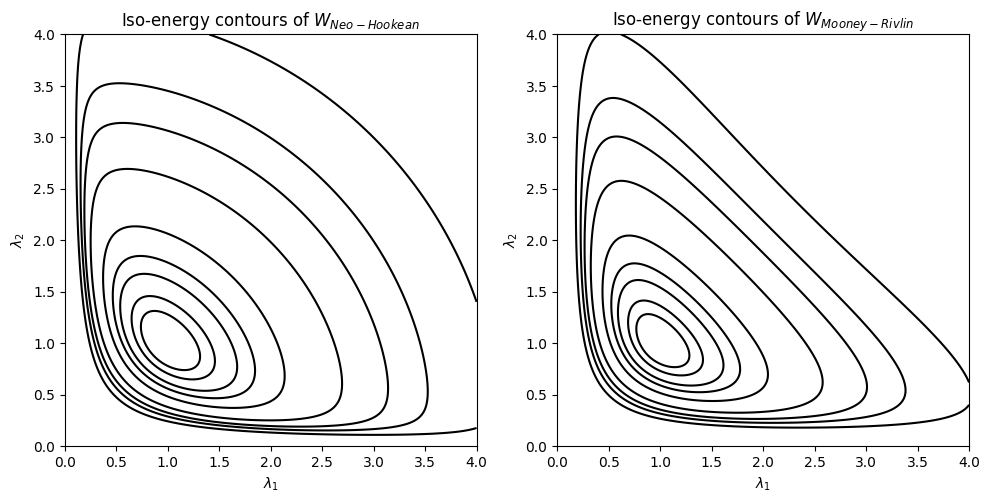

In [95]:
# -------------------------------
# Parameters (example: Yeoh model)
# -------------------------------
C1 = 0.25  # MPa
C2 = 0.02  # MPa
C3 = 0.001 # MPa

# -------------------------------
# Grid in stretch space (λ1, λ2)
# -------------------------------
lam1_vec = np.linspace(-0.5, 4.0, 500)
lam2_vec = np.linspace(-0.5, 4.0, 500)
Lam1, Lam2 = np.meshgrid(lam1_vec, lam2_vec)

# Incompressibility: λ1 * λ2 * λ3 = 1  → λ3 = 1/(λ1 λ2)
Lam3 = 1.0 / (Lam1 * Lam2)

c10N = 0.2
c01N = 0.05
muN = 0.4
# -------------------------------
# Strain energy W(λ1, λ2)
# Example: Yeoh W = C1(I1-3) + C2(I1-3)^2 + C3(I1-3)^3
# -------------------------------
I1nu = Lam1**2 + Lam2**2 + Lam3**2
# I2 = λ1^2 λ2^2 + λ2^2 λ3^2 + λ3^2 λ1^2
I2nu = (Lam1**2 * Lam2**2 +
      Lam2**2 * Lam3**2 +
      Lam3**2 * Lam1**2)
W_MR_numerical = c10N * (I1nu- 3.0) + c01N*(I2nu - 3.0)
W_NH_numerical = muN/2*(I1nu-3.0)

# If you want Gent instead, comment the Yeoh line and use:
# mu  = 0.5    # MPa
# Jm  = 20.0
# W = -0.5*mu*Jm * np.log(1.0 - (I1 - 3.0)/Jm)

# -------------------------------
# Iso-energy contour plot
# -------------------------------
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 8))
#cs = ax.contourf(Lam1, Lam2, W_MR_numerical, levels=20)# cmap='viridis')
levels = [0.05, 0.10, 0.20, 0.30, 0.50,1.0,1.5, 2.0, 3.0]   # user-defined iso-energy values
cs = ax1.contour(Lam1, Lam2, W_NH_numerical, levels=levels, colors='k')  # only lines
#ax.clabel(cs, inline=False, fontsize=8) 
#cbar = fig.colorbar(cs, ax=ax)
#cbar.set_label('Strain energy density W (MPa)')

ax1.set_xlabel(r'$\lambda_1$')
ax1.set_xlim([0,4.0])
ax1.set_ylim([0,4.0])

ax1.set_ylabel(r'$\lambda_2$')
ax1.set_title('Iso-energy contours of $W_{Neo-Hookean}$')
ax1.set_aspect('equal')




cs = ax2.contour(Lam1, Lam2, W_MR_numerical, levels=levels, colors='k')  # only lines
#ax.clabel(cs, inline=False, fontsize=8) 
#cbar = fig.colorbar(cs, ax=ax)
#cbar.set_label('Strain energy density W (MPa)')
ax2.set_xlabel(r'$\lambda_1$')
ax2.set_xlim([0,4.0])
ax2.set_ylim([0,4.0])
ax2.set_ylabel(r'$\lambda_2$')
ax2.set_title('Iso-energy contours of $W_{Mooney-Rivlin}$')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show
